In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Matching-Ergebnisse laden
df = pd.read_csv("../tests/matching_ergebnis.csv")
print(df.head())

                         teilaufgabe_id                teilaufgabe  \
0  d36f33df-bf4d-4d31-b9ad-ea6b032b24bf      Entwurf CAD-Baugruppe   
1  87d1a35e-646c-43b2-a596-afe5e42ee009    Simulation FEM-Struktur   
2  47f30b6e-b3c2-4eea-991f-1de8b0511d30  Signalverarbeitung Sensor   
3  6ff7a37a-3848-4a9f-8a40-868becf94b16   Entwicklung Python-Modul   
4  6ff7a37a-3848-4a9f-8a40-868becf94b16   Entwicklung Python-Modul   

                             projekt_id           kompetenz  \
0  2d7c8957-df13-4182-95af-74596ca0ea95                 CAD   
1  2d7c8957-df13-4182-95af-74596ca0ea95                 FEM   
2  2d7c8957-df13-4182-95af-74596ca0ea95  Signalverarbeitung   
3  2d7c8957-df13-4182-95af-74596ca0ea95              Python   
4  2d7c8957-df13-4182-95af-74596ca0ea95              Python   

                              person_id                                  name  \
0  32b9accd-e475-4d13-a0fd-c4c27fc29650                         Erich Carsten   
1  f3100a30-e900-497a-a3df-84de838781e

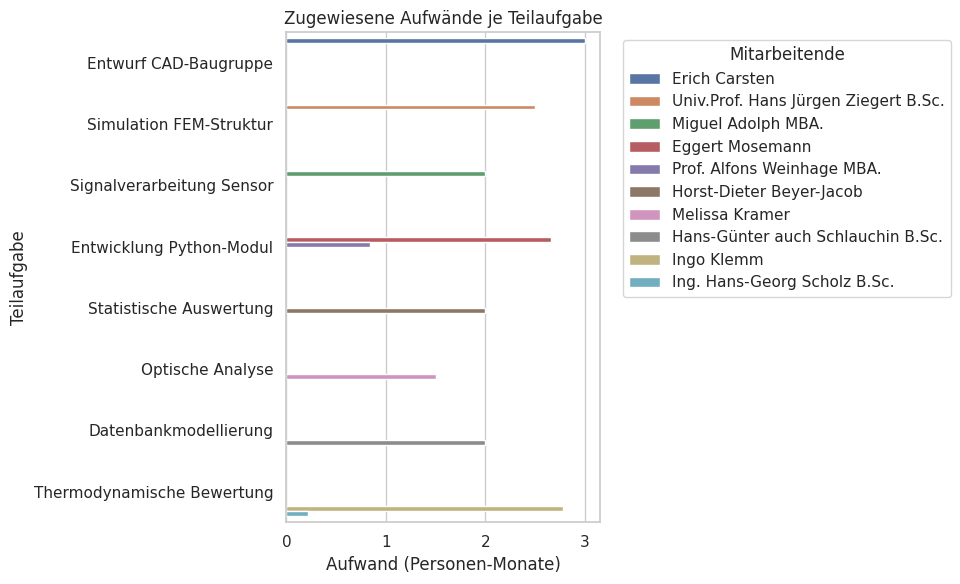

In [ ]:
# Plot-Stil
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=df,
    x="zugewiesener_aufwand",
    y="teilaufgabe",
    hue="name",
    dodge=True
)

plt.title("Zugewiesene Aufwände je Teilaufgabe")
plt.xlabel("Aufwand (Personen-Monate)")
plt.ylabel("Teilaufgabe")
plt.legend(title="Mitarbeitende", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
# Optional: Kürzen für bessere Lesbarkeit
df["teilaufgabe_kurz"] = df["teilaufgabe"].str.slice(0, 25) + "..."
df["name_kurz"] = df["name"].str.split().str[-1]

In [7]:
# Nur Daten mit Score > 0
df = df[df[1] > 0]

# Prüfen, ob überhaupt Daten übrig sind
if df.empty:
    print("Keine Ergebnisse mit Score > 0 gefunden.")
else:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x="teilaufgabe_kurz",
        y="score",
        hue="name_kurz",
        palette="Set2"
    )
    plt.title("Top 3 Mitarbeitende je Teilaufgabe (nach Score)", fontsize=14)
    plt.ylabel("Score (Verfügbarkeit × Zeitbudget)")
    plt.xlabel("Teilaufgabe")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Mitarbeitende", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


KeyError: 1